<a href="https://colab.research.google.com/github/Arja-Balu/FML/blob/main/Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
data=pd.read_csv("/housing.csv")
print(data.to_string())

        RM  LSTAT  PTRATIO       MEDV
0    6.575   4.98     15.3   504000.0
1    6.421   9.14     17.8   453600.0
2    7.185   4.03     17.8   728700.0
3    6.998   2.94     18.7   701400.0
4    7.147   5.33     18.7   760200.0
5    6.430   5.21     18.7   602700.0
6    6.012  12.43     15.2   480900.0
7    6.172  19.15     15.2   569100.0
8    5.631  29.93     15.2   346500.0
9    6.004  17.10     15.2   396900.0
10   6.377  20.45     15.2   315000.0
11   6.009  13.27     15.2   396900.0
12   5.889  15.71     15.2   455700.0
13   5.949   8.26     21.0   428400.0
14   6.096  10.26     21.0   382200.0
15   5.834   8.47     21.0   417900.0
16   5.935   6.58     21.0   485100.0
17   5.990  14.67     21.0   367500.0
18   5.456  11.69     21.0   424200.0
19   5.727  11.28     21.0   382200.0
20   5.570  21.02     21.0   285600.0
21   5.965  13.83     21.0   411600.0
22   6.142  18.72     21.0   319200.0
23   5.813  19.88     21.0   304500.0
24   5.924  16.30     21.0   327600.0
25   5.599  

In [15]:
data1=data.head(400)
x = data1.drop('MEDV', axis=1).values
y=data1['MEDV'].values

In [16]:
print(type(y))

<class 'numpy.ndarray'>


In [28]:
x_rooms = x[:, 0]#takes single feature from the dataset
print(x_rooms)

[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  5.854 6.101 5.877 6.3

In [24]:
print(y)

[ 504000.  453600.  728700.  701400.  760200.  602700.  480900.  569100.
  346500.  396900.  315000.  396900.  455700.  428400.  382200.  417900.
  485100.  367500.  424200.  382200.  285600.  411600.  319200.  304500.
  327600.  291900.  348600.  310800.  386400.  441000.  266700.  304500.
  277200.  275100.  283500.  396900.  420000.  441000.  518700.  646800.
  732900.  558600.  531300.  518700.  445200.  405300.  420000.  348600.
  302400.  407400.  413700.  430500.  525000.  491400.  396900.  743400.
  518700.  663600.  489300.  411600.  392700.  336000.  466200.  525000.
  693000.  493500.  407400.  462000.  365400.  438900.  508200.  455700.
  478800.  491400.  506100.  449400.  420000.  436800.  445200.  426300.
  588000.  501900.  520800.  480900.  501900.  558600.  472500.  466200.
  495600.  602700.  474600.  462000.  480900.  525000.  432600.  596400.
  449400.  812700.  919800.  697200.  577500.  556500.  390600.  405300.
  422100.  409500.  409500.  428400.  415800.  4074

In [29]:
x_rooms = x_rooms.reshape(-1,1)
y = y.reshape(-1, 1)

Text(0, 0.5, 'house value')

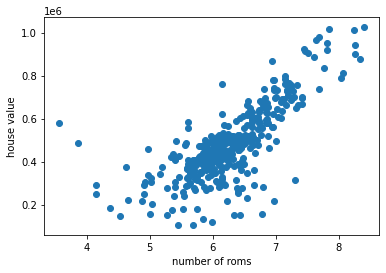

In [34]:
plt.scatter(x_rooms, y)
plt.xlabel('number of roms')
plt.ylabel('house value')

In [35]:
reg = linear_model.LinearRegression()
reg.fit(x_rooms, y)

LinearRegression()

In [36]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(x_rooms)

print(f'MAE = {mean_absolute_error(y, y_pred)}')
print(f'MSE = {mean_squared_error(y, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'R_2 = {r2_score(y, y_pred)}')

MAE = 74108.36284791055
MSE = 11788205270.264
RMSE = 108573.50169476897
R_2 = 0.5739325866535216


In [37]:
prediction_space = np.linspace(min(x_rooms), max(x_rooms)).reshape(-1,1)